#### load in modules

In [1]:
from scipy.stats import linregress
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#### read in key statistics extracted from relevant COVID-19 studies

In [10]:
# read in key statistics
COVID19_studies_df = pd.read_csv('../data/COVID-19_studies_extracted_data.tsv', sep='\t')

In [11]:
# calculate number of reported/confirmed cases from number of sequences included and sampling proportion
COVID19_studies_df['case_num'] = COVID19_studies_df['seq_num'] / COVID19_studies_df['sampling_prop']

In [12]:
# omit study considering multiple continents
COVID19_studies_df = COVID19_studies_df[~COVID19_studies_df.continent.isnull()].copy()

In [14]:
# specify continent colours
continent_colours = {
    'Africa': '#CB5C4C',
    'Asia': '#EF8733',
    'Europe': '#5A8AF7',
    'North America': '#655099',
    'Oceania': '#43972A',
    'South America': '#F7D45A'
}

# add to COVID19_studies_df
COVID19_studies_df['colour'] = COVID19_studies_df['continent'].apply(lambda x: continent_colours[x] if x in continent_colours else np.nan)

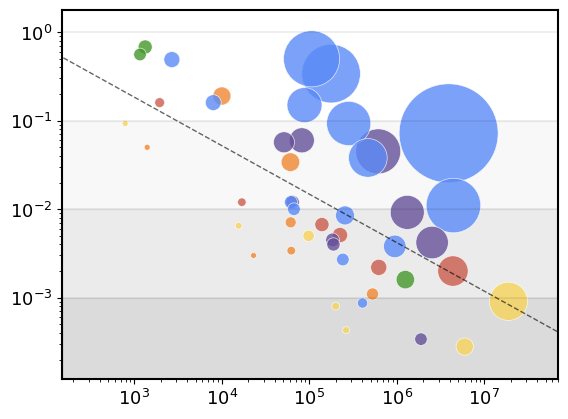

In [16]:
fig, ax = plt.subplots()

# specify axis limits
min_x = 150
max_x = 7e7
min_y = 1.2E-4
max_y = 1.8

# colour all regions below y=0.1
ax.axhspan(min_y, 0.1, color='grey', alpha=0.05)
# colour all regions below y=0.05
ax.axhspan(min_y, 0.01, color='grey', alpha=0.1)
# colour all regions below y=0.01
ax.axhspan(min_y, 0.001, color='grey', alpha=0.15)

# add horizontal lines at y=0.001, 0.01, 0.1, 1
ax.axhline(y=0.001, color='k', linestyle='-', linewidth=0.3, alpha=0.3)
ax.axhline(y=0.01, color='k', linestyle='-', linewidth=0.3, alpha=0.3)
ax.axhline(y=0.1, color='k', linestyle='-', linewidth=0.3, alpha=0.3)
ax.axhline(y=1, color='k', linestyle='-', linewidth=0.3, alpha=0.3)

# specify zorder to ensure that smaller points are plotted on top of larger points
COVID19_studies_df = COVID19_studies_df.sort_values('seq_num', ascending=False)
ax.scatter(COVID19_studies_df['case_num'], COVID19_studies_df['sampling_prop'],
           color=COVID19_studies_df['colour'], edgecolors='white', linewidths=0.5,
           s=np.power(COVID19_studies_df['seq_num'], 0.68), alpha=0.8)

# log scale
ax.set_xscale('log')
ax.set_yscale('log')

# add regression line between log10(case_num) and log10(sampling_prop)
slope, intercept, r_value, p_value, std_err = linregress(np.log10(COVID19_studies_df['case_num']),
                                                         np.log10(COVID19_studies_df['sampling_prop']))
x = np.linspace(0, 8, 100)
y = slope * x + intercept
ax.plot(np.power(10, x), np.power(10, y), color='black', linestyle='--', linewidth=1, alpha=0.6, zorder=100)

# # set xy-limits
ax.set_xlim(min_x, max_x)
ax.set_ylim(min_y, max_y)

# add border and adjust thickness
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)

# adjust tick labels and font size
ax.tick_params(axis='both', which='major', labelsize=13)
ax.tick_params(axis='both', which='minor', labelsize=13)

plt.show()

# export as pdf
fig.savefig('./figures/fig-1.pdf', bbox_inches='tight')

In [23]:
# get statistics for regression line between log10(case_num) and log10(sampling_prop)
print(f"Pearson's r: {r_value}")
print(f"p-value: {p_value}")
print(f"slope: {slope}")

Pearson's r: -0.6271038906853132
p-value: 2.3981216665409716e-06
slope: -0.5479106052980371
